## Data Loading

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv("FastFoodNutritionMenuV3.csv")

df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


## Removed the annoying "\n" in column names

In [23]:
df.columns = df.columns.str.replace("\n", " ").str.strip().str.replace(" ", "_")
df.head()

,Company,Item,Calories,Calories_from_Fat,Total_Fat_(g),Saturated_Fat_(g),Trans_Fat_(g),Cholesterol_(mg),Sodium__(mg),Carbs_(g),Fiber_(g),Sugars_(g),Protein_(g),Weight_Watchers_Pnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


## Preprocessing stuff
Removed the rows that lacks WW score, padded the missing values with mean value

In [24]:
df.replace("-", np.nan, inplace=True)
df.dropna(subset=["Weight_Watchers_Pnts"], inplace=True)

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

imputer = SimpleImputer(strategy="mean")
df.iloc[:, 2:] = imputer.fit_transform(df.iloc[:, 2:])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 0 to 889
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               887 non-null    object 
 1   Item                  887 non-null    object 
 2   Calories              887 non-null    float64
 3   Calories_from_Fat     887 non-null    float64
 4   Total_Fat_(g)         887 non-null    float64
 5   Saturated_Fat_(g)     887 non-null    float64
 6   Trans_Fat_(g)         887 non-null    float64
 7   Cholesterol_(mg)      887 non-null    float64
 8   Sodium__(mg)          887 non-null    float64
 9   Carbs_(g)             887 non-null    float64
 10  Fiber_(g)             887 non-null    float64
 11  Sugars_(g)            887 non-null    float64
 12  Protein_(g)           887 non-null    float64
 13  Weight_Watchers_Pnts  887 non-null    float64
dtypes: float64(12), object(2)
memory usage: 103.9+ KB


## Sanity check

In [25]:
df.describe()


,Calories,Calories_from_Fat,Total_Fat_(g),Saturated_Fat_(g),Trans_Fat_(g),Cholesterol_(mg),Sodium__(mg),Carbs_(g),Fiber_(g),Sugars_(g),Protein_(g),Weight_Watchers_Pnts
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,288.687215,110.198413,11.069064,3.925228,0.159817,38.544304,412.442922,39.682648,1.071594,26.699772,9.007991,310.270548
std,228.855949,100.751298,14.367656,5.281987,0.523301,70.846889,514.468728,33.538055,2.041765,33.409053,11.670560,237.149173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,70.000000,15.000000,0.000000,2.000000,0.000000,147.500000
50%,250.000000,110.198413,6.000000,2.500000,0.000000,10.000000,160.000000,34.000000,0.000000,11.000000,5.000000,276.000000
75%,400.000000,110.198413,17.000000,6.000000,0.000000,45.000000,620.000000,53.500000,1.071594,42.000000,13.000000,427.000000
max,1220.000000,750.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,1317.000000


## Data visualization


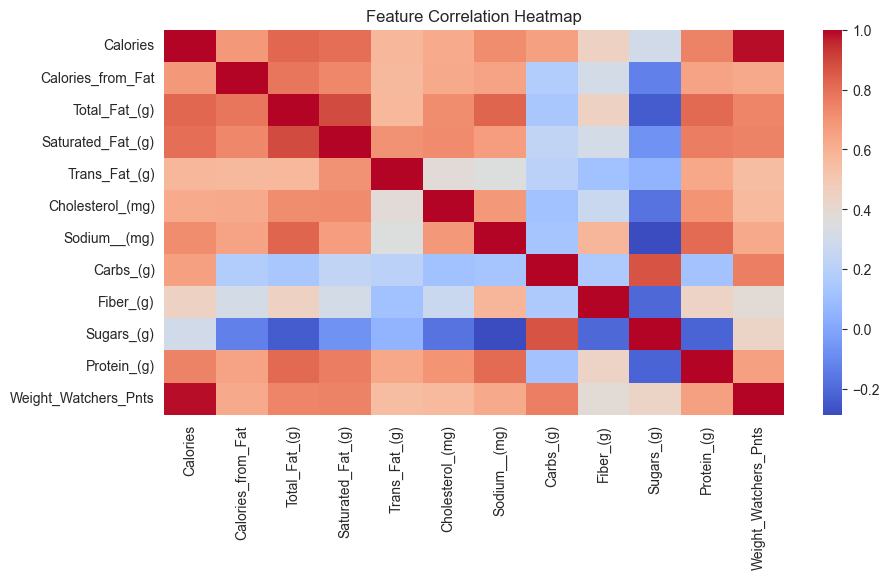

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

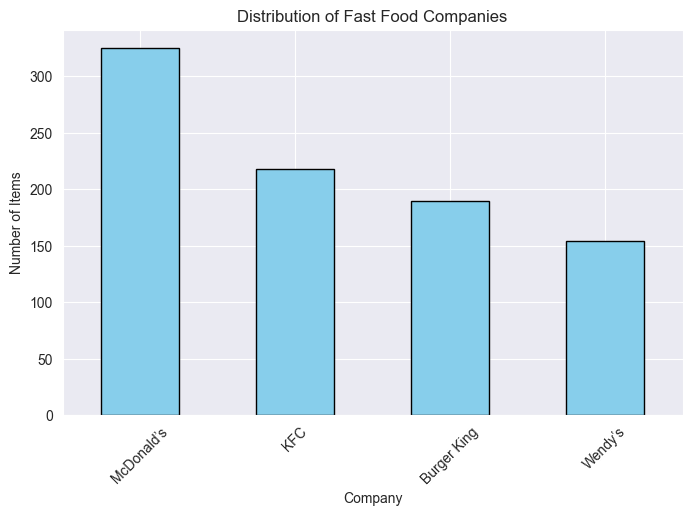

In [27]:
plt.figure(figsize=(8, 5))
df["Company"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Fast Food Companies")
plt.xlabel("Company")
plt.ylabel("Number of Items")
plt.xticks(rotation=45)
plt.show()

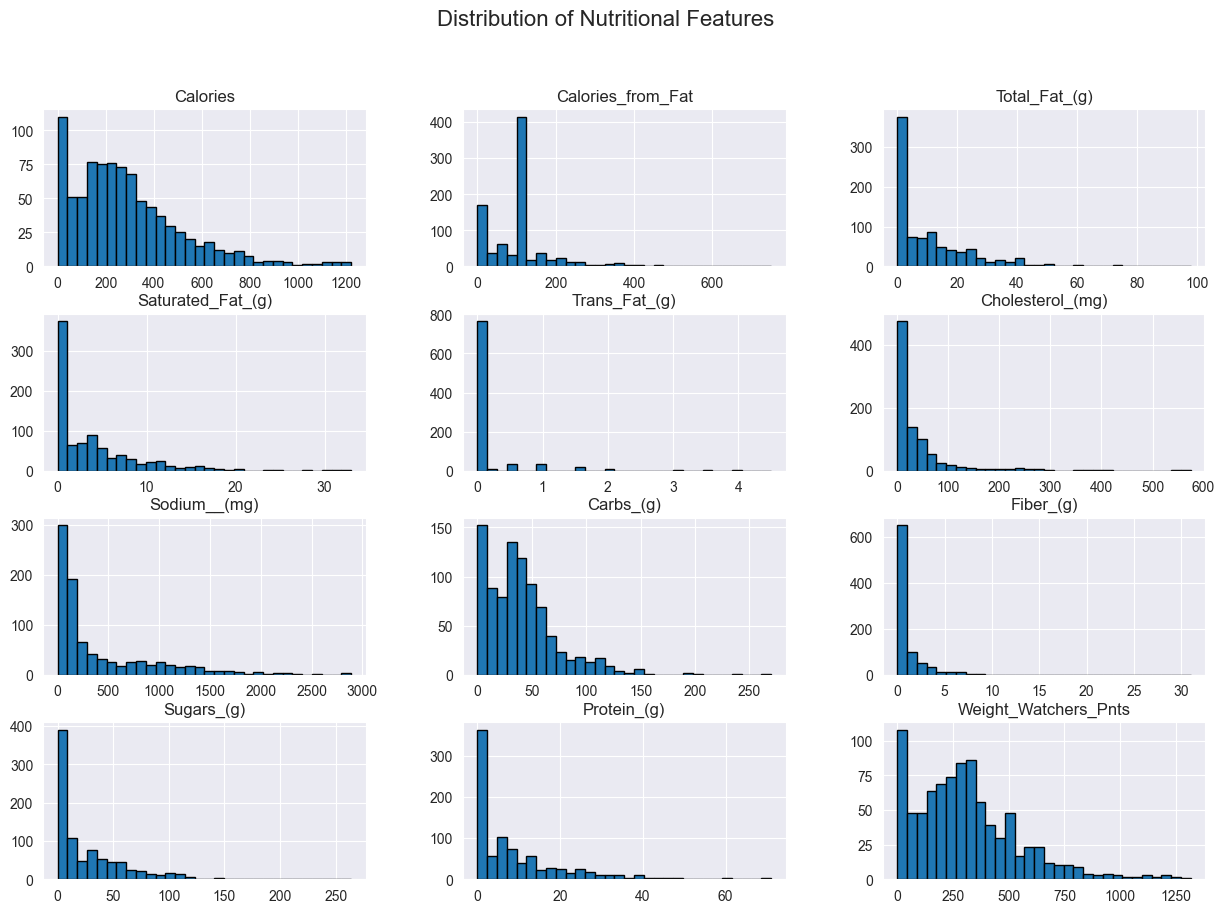

In [28]:
df.select_dtypes(include=[np.number]).hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Nutritional Features", fontsize=16)
plt.show()

## Feature Engineering

In [33]:
df["Calorie_Protein_Ratio"] = df["Calories"] / df["Protein_(g)"]
df["Fat_Carb_Ratio"] = df["Total_Fat_(g)"] / df["Carbs_(g)"]

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

scaler = StandardScaler()
num_features = df.select_dtypes(include=[np.number]).columns
df[num_features] = scaler.fit_transform(df[num_features])

df.head()

,Company,Item,Calories,Calories_from_Fat,Total_Fat_(g),Saturated_Fat_(g),Trans_Fat_(g),Cholesterol_(mg),Sodium__(mg),Carbs_(g),Fiber_(g),Sugars_(g),Protein_(g),Weight_Watchers_Pnts,Calorie_Protein_Ratio,Fat_Carb_Ratio
0,McDonald’s,Hamburger,-0.169142,-0.299901,-0.144090,-0.080551,0.650438,-0.191285,0.209182,-0.259036,0.454964,-0.619935,0.256517,-0.264837,-0.095942,-0.020748
1,McDonald’s,Cheeseburger,0.049460,-0.001970,0.064830,0.393023,0.650438,0.020559,0.656498,-0.199368,0.454964,-0.619935,0.513719,-0.055990,-0.091049,-0.065810
2,McDonald’s,Double Cheeseburger,0.661543,0.991133,0.830871,1.340171,2.562462,0.585475,1.434437,-0.169534,0.454964,-0.589986,1.371059,0.517812,-0.088548,-0.299738
3,McDonald’s,McDouble,0.442942,0.593891,0.552311,0.771882,1.606450,0.373631,0.987122,-0.199368,0.454964,-0.589986,1.113857,0.306855,-0.089097,-0.190814
4,McDonald’s,Quarter Pounder® with Cheese,0.967585,1.189753,1.039791,1.529600,2.562462,0.726704,1.512231,0.009468,0.945013,-0.530089,1.713996,0.808932,-0.088017,5.565433


## PCA & K-means clustering

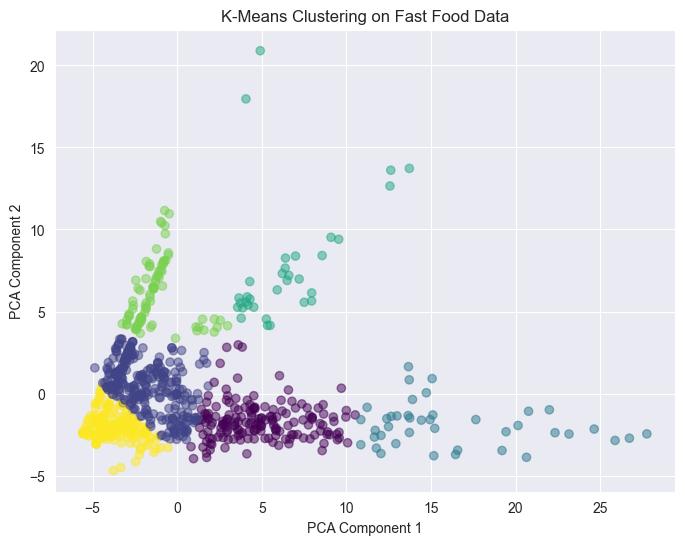

In [41]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.loc[:, df_numeric.var() > 0]
df_numeric = df_numeric.dropna()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

kmeans = KMeans(n_clusters=6, random_state=10)
df["Cluster"] = kmeans.fit_predict(df_numeric)

plt.figure(figsize=(8, 6))
plt.scatter(df["PCA1"], df["PCA2"], c=df["Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering on Fast Food Data")
plt.show()